<a href="https://colab.research.google.com/github/vcbonani/Python/blob/main/Pandas_1_Desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Descrição

Esse notebook foi construído para realizar os desafios propostos no final de cada aula do curso **Pandas: conhecendo a biblioteca**

## Aula 1: Conhecendo a base de dados

### Desafio 1
Importe o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) e armazene seu conteúdo em um DataFrame Pandas

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
dados_alunos = pd.read_csv(url)

### Desafio 2
Visualize as primeiras 7 linhas do DataFrame e as 5 últimas

In [ ]:
dados_alunos.head(7)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True


In [ ]:
dados_alunos.tail(5)

,Nome,Idade,Notas,Aprovado
13,Mirla,25,9.0,True
14,Paulo,37,NaN,False
15,Mylena,29,7.0,True
16,Lucas,33,NaN,False
17,Nadia,34,8.0,True


### Desafio 3
Confira a quantidade de linhas e colunas do DataFrame

In [ ]:
dados_alunos.shape #18 linhas e 4 colunas

(18, 4)

### Desafio 4
Explore as colunas do DataFrame e analise os tipos dos dados presentes em cada coluna

In [ ]:
dados_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nome      18 non-null     object 
 1   Idade     18 non-null     int64  
 2   Notas     12 non-null     float64
 3   Aprovado  18 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 582.0+ bytes


In [ ]:
dados_alunos[['Nome','Idade','Notas','Aprovado']]

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,NaN,False


### **Extra**
Calcule algumas estatísticas descritivas básicas dos dados do DataFrame (média, desvio padrão, etc) - Dica: pesquise pelo método **describe**

In [ ]:
dados_alunos.describe() #esta função traz das colunas numéricas a contagem de linhas, média, desvio padrão, valor mínimo, quartis e o valor máximo

,Idade,Notas
count,18.000000,12.000000
mean,25.500000,6.800000
std,6.070662,2.204953
min,18.000000,2.500000
25%,21.000000,5.450000
50%,24.500000,7.000000
75%,28.750000,8.250000
max,37.000000,10.000000


In [ ]:
### testando o groupby

import pandas as pd

df = pd.DataFrame({
   'Animal': ['Cachorro', 'Gato', 'Elefante', 'Cachorro', 'Gato', 'Elefante'],
   'Cor': ['Preto', 'Branco', 'Cinza', 'Marrom', 'Preto', 'Marrom'],
   'Quantidade': [2, 3, 1, 4, 2, 2]
})

#Vamos utilizar o groupby para agrupar os dados pelo tipo de animal e
#realizarmos a soma da coluna "Quantidade" para conferirmos o total de cada tipo de animal
df.groupby('Animal').sum(numeric_only=True)

#vamos agrupar pelo tipo do animal e também pela cor e realizar a soma da coluna "Quantidade"
df.groupby(['Animal', 'Cor'])[['Quantidade']].sum()

Quantidade
Animal   Cor               
Cachorro Marrom           4
         Preto            2
Elefante Cinza            1
         Marrom           2
Gato     Branco           3
         Preto            2

## Aula 2: Análise exploratória dos dados

Para os desafios dessa aula, vamos utilizar a mesma base de dados que estamos utilizando para o desenvolvimento do nosso projeto. Sendo assim, na célula abaixo vamos realizar a importação dessa base de dados e aplicar as transformações já realizadas até o momento da aula 2.

In [ ]:
import pandas as pd

In [ ]:
# importando a base de dados
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep=';')

In [ ]:
imoveis_comerciais = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

# removendo imóveis comerciais
df = dados.query('@imoveis_comerciais not in Tipo')

# selecionando apenas imóveis do tipo apartamento
df = df.query('Tipo == "Apartamento"')

# visualizando a base de dados
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


### Desafio 1
Calcular a média de quartos por apartamento

In [ ]:
print(f'Média de quartos por apartamento: {df.Quartos.mean():.2f}')

Média de quartos por apartamento: 2.48


### Desafio 2
Conferir quantos bairros únicos existem na nossa base de dados

In [ ]:
df.Bairro.describe() #existem 149 bairros únicos

,Bairro
count,19532
unique,149
top,Barra da Tijuca
freq,3341


### Desafio 3
Analisar quais bairros possuem a média de valor de aluguel mais elevadas

In [ ]:
#os 10 bairros com as médias de aluguel mais elevadas
df.groupby('Bairro')['Valor'].mean().sort_values(ascending=False).head(10)

,Valor
Bairro,
Joá,15500.000000
Arpoador,12429.769231
Cidade Jardim,12000.000000
Ipanema,9487.205317
Botafogo,9369.207116
Leblon,8637.761483
Lagoa,8063.804928
São Conrado,7859.871245
Jardim Oceânico,7626.086957


### Desafio 4
Criar um gráfico de barras verticais que apresente os 5 bairros com a média de valor de aluguel mais elevadas

<Axes: xlabel='Bairro', ylabel='Valor médio de aluguel'>

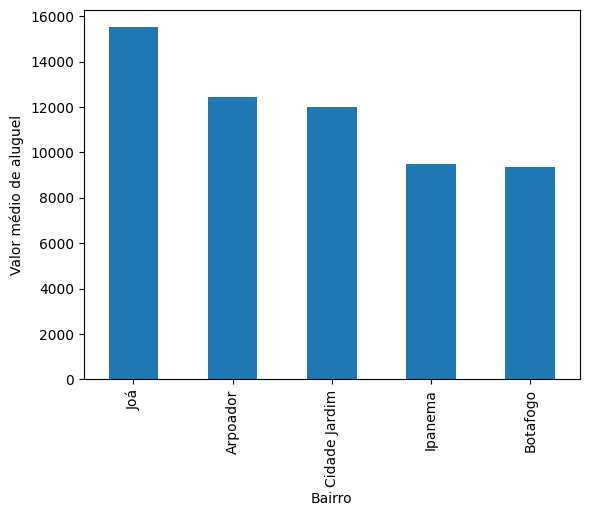

In [ ]:
df.groupby('Bairro')['Valor'].mean().sort_values(ascending=False).head(5).plot(kind = 'bar', ylabel = 'Valor médio de aluguel')
#df_aluguel_elevado = df.groupby('Bairro')['Valor'].mean().sort_values(ascending=False).head(5)
#df_aluguel_elevado.plot(kind = 'bar')

## Aula 3

Importe novamente o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) para realizar os desafios abaixo.

In [ ]:
# Importando novamente os dados

url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
df_alunos = pd.read_csv(url, sep = ',')
df_alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,NaN,False


### Desafio 1
Verifique se a base de dados possui dados nulos e caso tenha, realize o tratamento desses dados nulos

In [ ]:
#verificando os registros que possuem campos nulos
df_alunos.isnull()
df_alunos.isnull().sum()

#substituir as notas nulas por 0 (zero)
df_alunos.fillna(0, inplace = True)
df_alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,0.0,False


### Desafio 2
Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados

In [ ]:
remover_alunos = df_alunos.query('Nome == "Alice" | Nome == "Carlos"').index
remover_alunos

Index([7, 8], dtype='int64')

In [ ]:
df_alunos.drop(remover_alunos, axis = 0, inplace = True)

In [ ]:
df_alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
9,Vitor,28,0.0,False
10,Daniel,21,0.0,False
11,Igor,24,4.5,False


### Desafio 3
Aplique um filtro que selecione apenas os alunos que foram aprovados

In [ ]:
df_alunos.query('Aprovado == True')

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,7.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


### Desafio 4
Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv"

In [ ]:
df_aprovados = df_alunos.query('Aprovado == True')
df_aprovados.to_csv('alunos_aprovados.csv', index = False, sep = ',')
pd.read_csv('alunos_aprovados.csv')

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Beto,21,10.0,True
2,Dara,21,7.0,True
3,Sthefanie,26,9.5,True
4,Mirla,25,9.0,True
5,Mylena,29,7.0,True
6,Nadia,34,8.0,True


### **Extra**
Ao conferir as notas dos alunos aprovados, notamos que algumas notas estavam incorretas. As alunas que tiraram nota 7.0, na verdade tinham um ponto extra que não foi contabilizado. Sendo assim, substitua as notas 7.0 da base de dados por 8.0. **Dica**: pesquise pelo método **replace**

In [ ]:
df_alunos.replace(7.0, 8.0, inplace = True)
df_alunos

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,8.0,True
9,Vitor,28,0.0,False
10,Daniel,21,0.0,False
11,Igor,24,4.5,False


In [ ]:
### EXercícios

import pandas as pd

dados = {
    'Nome': ['Jetta', 'Passat', 'Crossfox', 'DS5', 'Fusca'],
    'Motor': ['Motor 4.0 Turbo', 'Motor Diesel', 'Motor Diesel V8', 'Motor 2.0', 'Motor 1.6'],
    'Ano': [2019, 2003, 1991, 2019, 1990],
    'Quilometragem': [0.0, 5712.0, 37123.0, 0.0, 120000.0],
    'Valor': [88000.0, 106000.0, 72000.0, 89000.0, 32000.0],
    'IPVA': [2000.0, 5000.0, 1700.0, 2200.0, 1000.0],
    'Desconto': [380.0, 450.0, 277.0, 400.0, 150.0]
}

df = pd.DataFrame(dados)

df['Valor_total'] = df['Valor'] + df['IPVA'] - df['Desconto']

df

,Nome,Motor,Ano,Quilometragem,Valor,IPVA,Desconto,Valor_total
0,Jetta,Motor 4.0 Turbo,2019,0.0,88000.0,2000.0,380.0,89620.0
1,Passat,Motor Diesel,2003,5712.0,106000.0,5000.0,450.0,110550.0
2,Crossfox,Motor Diesel V8,1991,37123.0,72000.0,1700.0,277.0,73423.0
3,DS5,Motor 2.0,2019,0.0,89000.0,2200.0,400.0,90800.0
4,Fusca,Motor 1.6,1990,120000.0,32000.0,1000.0,150.0,32850.0


## Aula 4

Importe novamente o arquivo [**alunos.csv**](https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv) para realizar os desafios abaixo.

In [ ]:
# Importando novamente os dados
dados = pd.read_csv(url)
dados.fillna(0, inplace = True)
dados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,0.0,False


### Desafio 1
Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles. Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles

In [ ]:
dados['Pontos_extras'] = dados['Notas'] * 0.4
dados

,Nome,Idade,Notas,Aprovado,Pontos_extras
0,Ary,20,7.5,True,3.00
1,Ana,18,0.0,False,0.00
2,Cátia,27,2.5,False,1.00
3,Denis,18,5.0,False,2.00
4,Beto,21,10.0,True,4.00
5,Bruna,23,0.0,False,0.00
6,Dara,21,7.0,True,2.80
7,Carlos,19,6.0,True,2.40
8,Alice,35,5.6,False,2.24
9,Vitor,28,0.0,False,0.00


### Desafio 2
Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras

In [ ]:
#usando o método assign para criar uma coluna nova somando a nota com os pontos extras
dados = dados.assign(Notas_finais = dados.Notas + dados.Pontos_extras)

#algumas notas finais superaram a nota 10
#essa função lamba é para corrigir as notas acima de 10 e deixá-las só com 10
dados['Notas_finais'] = dados.Notas_finais.apply(lambda x: x if x <= 10 else x - (x - 10))
dados

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais
0,Ary,20,7.5,True,3.00,10.00
1,Ana,18,0.0,False,0.00,0.00
2,Cátia,27,2.5,False,1.00,3.50
3,Denis,18,5.0,False,2.00,7.00
4,Beto,21,10.0,True,4.00,10.00
5,Bruna,23,0.0,False,0.00,0.00
6,Dara,21,7.0,True,2.80,9.80
7,Carlos,19,6.0,True,2.40,8.40
8,Alice,35,5.6,False,2.24,7.84
9,Vitor,28,0.0,False,0.00,0.00


### Desafio 3
Como os alunos ganharam pontos extras, alguns que não tinham sido aprovados antes podem ter sido aprovados agora. Com base nisso, crie uma coluna chamada "Aprovado_final" com os seguintes valores:

* True: caso o aluno esteja aprovado (nota final deve ser maior ou igual a 6);
* False: caso o aluno esteja reprovado (nota final deve ser menor que 6).


In [ ]:
dados['Aprovado_final'] = dados['Notas_finais'].apply(lambda x: True if x >= 6 else False)
dados

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
0,Ary,20,7.5,True,3.00,10.00,True
1,Ana,18,0.0,False,0.00,0.00,False
2,Cátia,27,2.5,False,1.00,3.50,False
3,Denis,18,5.0,False,2.00,7.00,True
4,Beto,21,10.0,True,4.00,10.00,True
5,Bruna,23,0.0,False,0.00,0.00,False
6,Dara,21,7.0,True,2.80,9.80,True
7,Carlos,19,6.0,True,2.40,8.40,True
8,Alice,35,5.6,False,2.24,7.84,True
9,Vitor,28,0.0,False,0.00,0.00,False


### Desafio 4
Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras

In [ ]:
dados.query('Aprovado == False and Aprovado_final == True')

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
3,Denis,18,5.0,False,2.00,7.00,True
8,Alice,35,5.6,False,2.24,7.84,True
11,Igor,24,4.5,False,1.80,6.30,True
